In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [5]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the time library and the datetime module from the datetime library 

from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hambantota
Processing Record 2 of Set 1 | cabedelo
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | harper
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | yakeshi
Processing Record 10 of Set 1 | faya
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | buala
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | bay roberts
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | garissa
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | kandrian
Processing Record 

Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | itarema
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | severo-kurilsk
Processing Record 43 of Set 4 | palmer
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | nguiu
City not found. Skipping...
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | forrest city
Processing Record 49 of Set 4 | port-gentil
Processing Record 50 of Set 4 | sabha
Processing Record 1 of Set 5 | kaeo
Processing Record 2 of Set 5 | mongu
Processing Record 3 of Set 5 | puerto escondido
Processing Record 4 of Set 5 | sabang
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | schoningen
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | lakes entrance
Processing Record 9 of Set 5 | ust-kuyga
Processing Record 10 of Set 5 | lavrentiya
Processing Record 11 of Set 5 | porto real
Processing Reco

Processing Record 32 of Set 8 | cruz grande
Processing Record 33 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 8 | san diego de los banos
Processing Record 35 of Set 8 | vale da amoreira
Processing Record 36 of Set 8 | fairbanks
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | buin
Processing Record 40 of Set 8 | nioro
Processing Record 41 of Set 8 | hofn
Processing Record 42 of Set 8 | constitucion
Processing Record 43 of Set 8 | karaul
City not found. Skipping...
Processing Record 44 of Set 8 | dori
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | dauriya
Processing Record 47 of Set 8 | nosy varika
Processing Record 48 of Set 8 | vao
Processing Record 49 of Set 8 | vanavara
Processing Record 50 of Set 8 | elizabeth city
Processing Record 1 of Set 9 | kabanjahe
Processing Record 2 of Set 9 | waconia
Processing Record 3 of Set 9 | sitka
Processing Record 4 of Se

Processing Record 18 of Set 12 | lyubim
Processing Record 19 of Set 12 | san juan
Processing Record 20 of Set 12 | maloy
Processing Record 21 of Set 12 | necochea
Processing Record 22 of Set 12 | canoinhas
Processing Record 23 of Set 12 | palencia
Processing Record 24 of Set 12 | verkhnyaya toyma
Processing Record 25 of Set 12 | quimperle
Processing Record 26 of Set 12 | izumo
Processing Record 27 of Set 12 | vysokogornyy
Processing Record 28 of Set 12 | lompoc
Processing Record 29 of Set 12 | sao felix do xingu
Processing Record 30 of Set 12 | vicuna
Processing Record 31 of Set 12 | laguna
Processing Record 32 of Set 12 | juneau
Processing Record 33 of Set 12 | dalvik
Processing Record 34 of Set 12 | taoudenni
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | eydhafushi
Processing Record 37 of Set 12 | duz
City not found. Skipping...
Processing Record 38 of Set 12 | yulara
Processing Record 39 of Set 12 | santiago
Processing Record 40 of Set 12 | owando
Process

In [9]:
len(city_data)

561

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.1241,81.1185,89.94,70,40,18.41,LK,2022-05-21 06:41:14
1,Cabedelo,-6.9811,-34.8339,75.87,88,24,7.58,BR,2022-05-21 06:47:56
2,Mataura,-46.1927,168.8643,41.18,92,100,12.50,NZ,2022-05-21 06:47:57
3,Qaanaaq,77.4840,-69.3632,14.41,86,100,4.27,GL,2022-05-21 06:47:57
4,Nikolskoye,59.7035,30.7861,51.80,43,14,7.87,RU,2022-05-21 06:47:58
5,Harper,4.3750,-7.7169,77.02,89,100,9.66,LR,2022-05-21 06:44:55
6,Punta Arenas,-53.1500,-70.9167,39.31,93,100,14.97,CL,2022-05-21 06:47:55
7,Rikitea,-23.1203,-134.9692,74.84,74,39,7.67,PF,2022-05-21 06:47:30
8,Yakeshi,49.2833,120.7333,70.27,20,96,16.49,CN,2022-05-21 06:47:59
9,Faya,18.3851,42.4509,79.32,11,12,13.24,SA,2022-05-21 06:38:52


In [11]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2022-05-21 06:41:14,6.1241,81.1185,89.94,70,40,18.41
1,Cabedelo,BR,2022-05-21 06:47:56,-6.9811,-34.8339,75.87,88,24,7.58
2,Mataura,NZ,2022-05-21 06:47:57,-46.1927,168.8643,41.18,92,100,12.50
3,Qaanaaq,GL,2022-05-21 06:47:57,77.4840,-69.3632,14.41,86,100,4.27
4,Nikolskoye,RU,2022-05-21 06:47:58,59.7035,30.7861,51.80,43,14,7.87
5,Harper,LR,2022-05-21 06:44:55,4.3750,-7.7169,77.02,89,100,9.66
6,Punta Arenas,CL,2022-05-21 06:47:55,-53.1500,-70.9167,39.31,93,100,14.97
7,Rikitea,PF,2022-05-21 06:47:30,-23.1203,-134.9692,74.84,74,39,7.67
8,Yakeshi,CN,2022-05-21 06:47:59,49.2833,120.7333,70.27,20,96,16.49
9,Faya,SA,2022-05-21 06:38:52,18.3851,42.4509,79.32,11,12,13.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


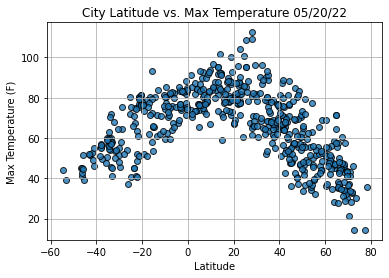

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

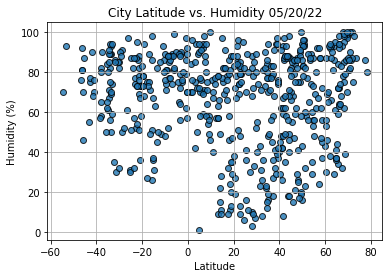

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

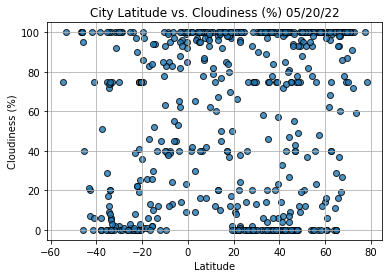

In [16]:
# refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," 
# the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%).

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

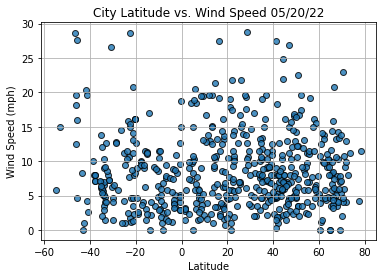

In [17]:
# create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to "wind speed," 
# the title to "Wind Speed," and the y-axis label to "Wind Speed (mph).

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()